<p><img style="float: right ;margin:7px 22px 7px 1px; max-width:250px" src="corona.jpg"></p>


### Data come from Johns Hopkins Github
[Johns Hopkins](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)


### Content
- Download & Clean Data
- Calculate daily confirmed cases world wide since Jan 2020
- China and US compared to the rest of the world
- Annotate the timeline
- Top 10 Hardest hit countries as of June 29 2020


### Package used : Pandas, Matplotlib

Reference : [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)
            [Lambda Function](https://www.w3schools.com/python/python_lambda.asp)

## 1. Download & Clean Data

In [181]:
import pandas as pd

In [182]:
# Download data from Github

path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df=pd.read_csv(path,index_col=False)
df.head(3)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571


In [183]:
# drop unwanted columns
df=df.drop(["Province/State","Lat","Long"], axis=1)

In [184]:
# change data from wide to long
df.set_index("Country/Region",inplace =True)
df=df.stack()
df

Country/Region         
Afghanistan     1/22/20     0
                1/23/20     0
                1/24/20     0
                1/25/20     0
                1/26/20     0
                           ..
Lesotho         6/25/20    17
                6/26/20    24
                6/27/20    24
                6/28/20    27
                6/29/20    27
Length: 42560, dtype: int64

In [185]:
df = df.reset_index()
df

,Country/Region,level_1,0
0,Afghanistan,1/22/20,0
1,Afghanistan,1/23/20,0
2,Afghanistan,1/24/20,0
3,Afghanistan,1/25/20,0
4,Afghanistan,1/26/20,0
...,...,...,...
42555,Lesotho,6/25/20,17
42556,Lesotho,6/26/20,24
42557,Lesotho,6/27/20,24
42558,Lesotho,6/28/20,27


In [186]:
df.rename(columns={'level_1':'date',0:"cases"}, inplace=True)
df.head(3)
df.dtypes

Country/Region    object
date              object
cases              int64
dtype: object

In [187]:
df['date'] = pd.to_datetime(df['date'])


In [188]:
print(df.head())
df.dtypes

  Country/Region       date  cases
0    Afghanistan 2020-01-22      0
1    Afghanistan 2020-01-23      0
2    Afghanistan 2020-01-24      0
3    Afghanistan 2020-01-25      0
4    Afghanistan 2020-01-26      0


Country/Region            object
date              datetime64[ns]
cases                      int64
dtype: object

## 2. Confirmed cases throughout the world

In [189]:
daily_cases=df.groupby("date").cases.sum()
daily_cases=daily_cases.to_frame().reset_index()
daily_cases.rename(columns={'cases':'cum_cases'}, inplace=True)
daily_cases.head(3)

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941


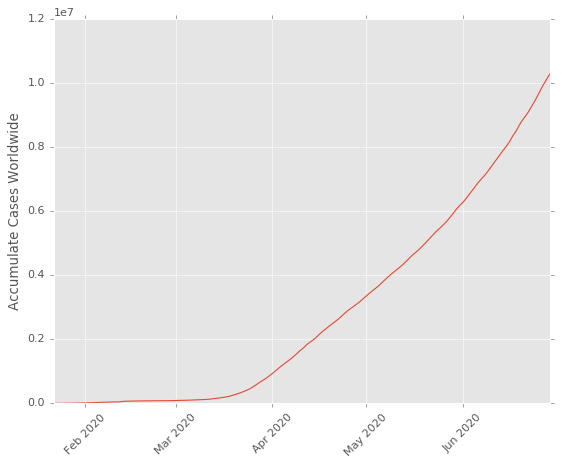

In [190]:
# plot data
from matplotlib import pyplot as plt

plt.style.use('ggplot')

plt.plot(daily_cases.date,daily_cases.cum_cases)

plt.xticks(rotation=45)
plt.ylabel("Accumulate Cases Worldwide")

plt.show();

## 3. China and US compared to the rest of the world

In [191]:
df['ISChinaUS']=df['Country/Region'].apply(lambda x: "China" if x=="China" else ('US' if x=='US' else 'others'))
df.head(3)


,Country/Region,date,cases,ISChinaUS
0,Afghanistan,2020-01-22,0,others
1,Afghanistan,2020-01-23,0,others
2,Afghanistan,2020-01-24,0,others


In [192]:
ChinaUS_vs_others=df.groupby(["date","ISChinaUS"]).cases.sum().reset_index()
ChinaUS_vs_others

,date,ISChinaUS,cases
0,2020-01-22,China,548
1,2020-01-22,US,1
2,2020-01-22,others,6
3,2020-01-23,China,643
4,2020-01-23,US,1
...,...,...,...
475,2020-06-28,US,2548996
476,2020-06-28,others,7512038
477,2020-06-29,China,84780
478,2020-06-29,US,2590552


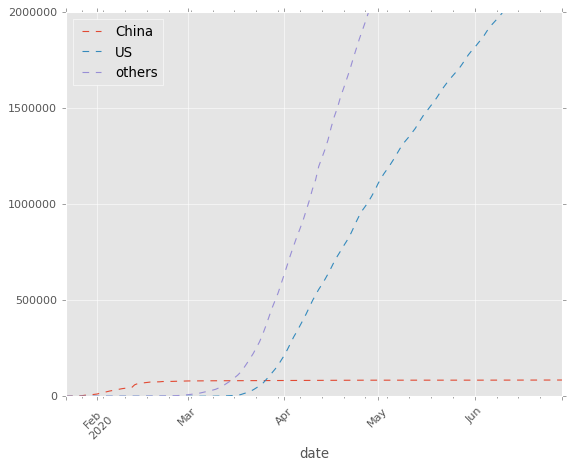

In [202]:
ChinaUS_vs_others.set_index('date').groupby('ISChinaUS')['cases'].plot(style='--', legend=True,rot=45, ylim=(0,2000000));


## 4. Annotate the timeline

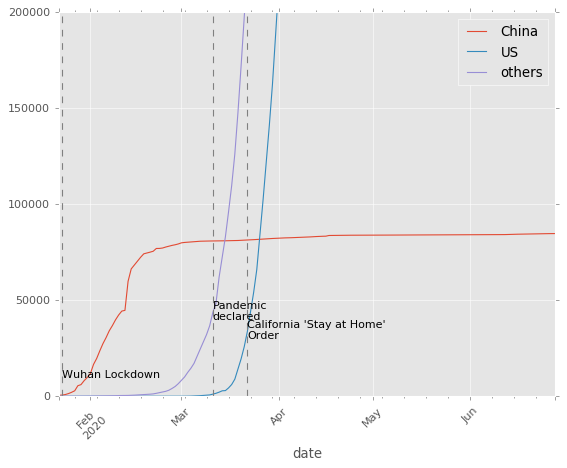

In [150]:
ChinaUS_vs_others.set_index('date').groupby('ISChinaUS')['cases'].plot(legend=True,rot=45, ylim=(0,200000));

plt.axvline(x='2020-01-23' , color="grey", linestyle="--");
plt.text('2020-01-23', 10000, "Wuhan Lockdown")

plt.axvline(x='2020-03-11' , color="grey", linestyle="--");
plt.text('2020-03-11', 40000, "Pandemic\ndeclared")

plt.axvline(x='2020-03-22' , color="grey", linestyle="--");
plt.text('2020-03-22', 30000, "California 'Stay at Home'\nOrder");

## 5. Top 10 Hardest hit countries as of June 29

In [203]:
top10=df[df.date=='2020-06-29'].sort_values('cases',ascending=False)['Country/Region'].head(10)
dftop10=df[df['Country/Region'].isin(top10)]


dftop10=dftop10.groupby(["date","Country/Region"]).cases.sum().reset_index()
dftop10[dftop10.date=='2020-06-29'].sort_values(by=['cases'],ascending=False)

,date,Country/Region,cases
1598,2020-06-29,US,2590552
1590,2020-06-29,Brazil,1368195
1596,2020-06-29,Russia,640246
1592,2020-06-29,India,566840
1599,2020-06-29,United Kingdom,313470
1595,2020-06-29,Peru,282365
1591,2020-06-29,Chile,275999
1597,2020-06-29,Spain,248970
1594,2020-06-29,Italy,240436
1593,2020-06-29,Iran,225205


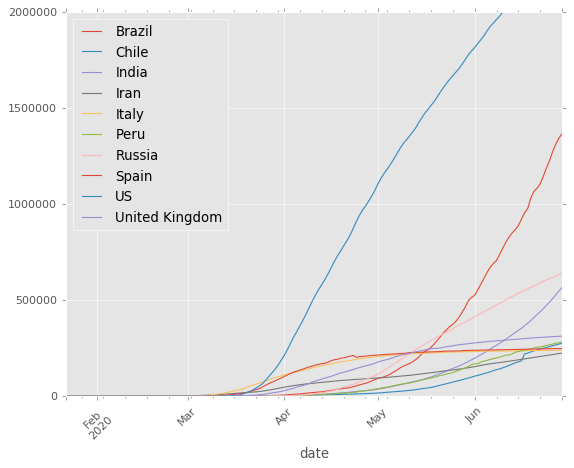

In [204]:
dftop10.set_index('date').groupby('Country/Region')['cases'].plot(legend=True,rot=45, ylim=(0,2000000));